# Building a Model

In [677]:
import pandas as pd

>Before we begin building our model we still need to merge our six dataframes.

### Joining and Cleaning the Data

In [678]:
food_balance_data = pd.read_csv("cleaned_data/food_balance_data.csv", encoding="utf-8")
cpi_data = pd.read_csv("cleaned_data/cpi_data.csv", encoding="utf-8")
crop_yield_data = pd.read_csv("cleaned_data/crop_yield_data.csv", encoding="utf-8")
temp_change_data = pd.read_csv("cleaned_data/temp_data.csv", encoding="utf-8")
nutrient_data = pd.read_csv("cleaned_data/nutrient_data.csv", encoding="utf-8")
pesticide_data = pd.read_csv("cleaned_data/pesticide_data.csv", encoding="utf-8")

>We will print the head of all dataframes to inspect the keys needed to join each dataframe.

In [679]:
food_balance_data.head(2)

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,YEAR,Losses
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5016,Loss,t,2010,3012.02
1,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5016,Loss,t,2010,510.00


In [680]:
cpi_data.head(2)

,Area Code,Area,Year,Avg_CPI,Avg_Food_Inflation
0,1,Armenia,2010,78.782383,8.954843
1,1,Armenia,2011,88.474800,12.335510


In [681]:
crop_yield_data.head(2)

,Area Code,Area,Item Code,Item,YEAR,Production
0,2,Afghanistan,221,"Almonds, in shell",2010,56000.0
1,2,Afghanistan,711,"Anise, badian, coriander, cumin, caraway, fenn...",2010,10200.0


In [682]:
temp_change_data.head(2)

,Area Code,Area,YEAR,Temperature Change
0,1,Armenia,2010,2.831824
1,1,Armenia,2011,0.351824


In [683]:
nutrient_data.head(2)

,Area Code,Area,YEAR,Nitrogen,Phosphorus,Potassium
0,1,Armenia,2010,21109.1266,-1138.5027,-4151.8274
1,1,Armenia,2011,21262.5433,-1598.1136,-5934.0518


In [684]:
pesticide_data.head(2)

,Area Code,Area,YEAR,Fungicides and Bactericides,Herbicides,Insecticides,Rodenticides
0,1,Armenia,2010,136.80,56.81,51.95,33.16
1,1,Armenia,2011,157.65,64.55,65.41,31.17


> First, the food balance data will be merged with the CPI data using the 'Area Code' and 'Year'.

In [685]:
agri_data = pd.merge(food_balance_data, cpi_data,
                     how='inner',
                     left_on=['Area Code', 'YEAR'], 
                     right_on=['Area Code', 'Year'], 
                     suffixes=['_FB', '_CPI'])

In [686]:
agri_data.head()

,Area Code,Area Code (M49),Area_FB,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,YEAR,Losses,Area_CPI,Year,Avg_CPI,Avg_Food_Inflation
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5016,Loss,t,2010,3012.02,Afghanistan,2010,75.083788,0.094617
1,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5016,Loss,t,2010,510.00,Afghanistan,2010,75.083788,0.094617
2,2,'004,Afghanistan,515,'01341,Apples,5016,Loss,t,2010,5012.38,Afghanistan,2010,75.083788,0.094617
3,2,'004,Afghanistan,526,'01343,Apricots,5016,Loss,t,2010,1996.80,Afghanistan,2010,75.083788,0.094617
4,2,'004,Afghanistan,44,'0115,Barley,5016,Loss,t,2010,65464.79,Afghanistan,2010,75.083788,0.094617


>We will drop unnecessary columns before continuing merges. The following columns will be dropped: Unit, Area_CPI, Element Code, Item Code (FBS) and Area Code (M49).

In [687]:
agri_data = agri_data.drop(columns=['Unit', 'Area_CPI', 'Element Code', 'Item Code (CPC)', 'Area Code (M49)'])

>The main dataframe will be merged with the temperature change data.

In [688]:
agri_data = agri_data.merge(temp_change_data,
                     how='inner',
                     left_on=['Area Code', 'YEAR'], 
                     right_on=['Area Code', 'YEAR'], 
                     suffixes=['_AG', '_TEMP'])

# Drop the duplicate area and year columns
agri_data = agri_data.drop(columns=['Area', 'Year'])

In [689]:
agri_data.head()

,Area Code,Area_FB,Item Code,Item,Element,YEAR,Losses,Avg_CPI,Avg_Food_Inflation,Temperature Change
0,2,Afghanistan,221,"Almonds, in shell",Loss,2010,3012.02,75.083788,0.094617,1.607765
1,2,Afghanistan,711,"Anise, badian, coriander, cumin, caraway, fenn...",Loss,2010,510.00,75.083788,0.094617,1.607765
2,2,Afghanistan,515,Apples,Loss,2010,5012.38,75.083788,0.094617,1.607765
3,2,Afghanistan,526,Apricots,Loss,2010,1996.80,75.083788,0.094617,1.607765
4,2,Afghanistan,44,Barley,Loss,2010,65464.79,75.083788,0.094617,1.607765


>The main dataframe and crop yield data will be merged using the area code, item code and year.

In [690]:
agri_data = agri_data.merge(crop_yield_data,
                     how='inner',
                     left_on=['Area Code', 'Item Code', 'YEAR'], 
                     right_on=['Area Code', 'Item Code', 'YEAR'], 
                     suffixes=['_AG', '_YIELD'])

# Drop the duplicate area and item columns
agri_data = agri_data.drop(columns=['Area', 'Item_YIELD'])

In [691]:
agri_data.head()

,Area Code,Area_FB,Item Code,Item_AG,Element,YEAR,Losses,Avg_CPI,Avg_Food_Inflation,Temperature Change,Production
0,2,Afghanistan,221,"Almonds, in shell",Loss,2010,3012.02,75.083788,0.094617,1.607765,56000.0
1,2,Afghanistan,711,"Anise, badian, coriander, cumin, caraway, fenn...",Loss,2010,510.00,75.083788,0.094617,1.607765,10200.0
2,2,Afghanistan,515,Apples,Loss,2010,5012.38,75.083788,0.094617,1.607765,59850.0
3,2,Afghanistan,526,Apricots,Loss,2010,1996.80,75.083788,0.094617,1.607765,66560.0
4,2,Afghanistan,44,Barley,Loss,2010,65464.79,75.083788,0.094617,1.607765,437000.0


>The main dataframe and the nutrient balance will be merged using the area code and year.

In [692]:
agri_data = agri_data.merge(nutrient_data,
                     how='inner',
                     left_on=['Area Code', 'YEAR'], 
                     right_on=['Area Code', 'YEAR'], 
                     suffixes=['_AG', '_NUTR'])

agri_data = agri_data.drop(columns='Area')

In [693]:
agri_data.head()

,Area Code,Area_FB,Item Code,Item_AG,Element,YEAR,Losses,Avg_CPI,Avg_Food_Inflation,Temperature Change,Production,Nitrogen,Phosphorus,Potassium
0,2,Afghanistan,221,"Almonds, in shell",Loss,2010,3012.02,75.083788,0.094617,1.607765,56000.0,10461.2661,-8371.6442,44839.7363
1,2,Afghanistan,711,"Anise, badian, coriander, cumin, caraway, fenn...",Loss,2010,510.00,75.083788,0.094617,1.607765,10200.0,10461.2661,-8371.6442,44839.7363
2,2,Afghanistan,515,Apples,Loss,2010,5012.38,75.083788,0.094617,1.607765,59850.0,10461.2661,-8371.6442,44839.7363
3,2,Afghanistan,526,Apricots,Loss,2010,1996.80,75.083788,0.094617,1.607765,66560.0,10461.2661,-8371.6442,44839.7363
4,2,Afghanistan,44,Barley,Loss,2010,65464.79,75.083788,0.094617,1.607765,437000.0,10461.2661,-8371.6442,44839.7363


>Lastly, the main dataframe will be merged with the pesticide data using the area code and year.

In [694]:
agri_data = agri_data.merge(pesticide_data,
                     how='inner',
                     left_on=['Area Code', 'YEAR'], 
                     right_on=['Area Code', 'YEAR'], 
                     suffixes=['_AG', '_PEST'])

agri_data = agri_data.drop(columns='Area')

In [695]:
agri_data.head()

,Area Code,Area_FB,Item Code,Item_AG,Element,YEAR,Losses,Avg_CPI,Avg_Food_Inflation,Temperature Change,Production,Nitrogen,Phosphorus,Potassium,Fungicides and Bactericides,Herbicides,Insecticides,Rodenticides
0,3,Albania,515,Apples,Loss,2010,6380.60,84.279351,5.188421,1.175059,54604.0,45923.1662,9512.6252,36652.9947,188.68,6.91,377.85,9.3
1,3,Albania,526,Apricots,Loss,2010,337.51,84.279351,5.188421,1.175059,3471.0,45923.1662,9512.6252,36652.9947,188.68,6.91,377.85,9.3
2,3,Albania,44,Barley,Loss,2010,811.94,84.279351,5.188421,1.175059,7300.0,45923.1662,9512.6252,36652.9947,188.68,6.91,377.85,9.3
3,3,Albania,176,"Beans, dry",Loss,2010,7305.69,84.279351,5.188421,1.175059,24000.0,45923.1662,9512.6252,36652.9947,188.68,6.91,377.85,9.3
4,3,Albania,181,"Broad beans and horse beans, dry",Loss,2010,9.43,84.279351,5.188421,1.175059,200.0,45923.1662,9512.6252,36652.9947,188.68,6.91,377.85,9.3


>Note: Afghanistan is no longer in the dataset as there was no reported data for pesticide use for the country. Now let's take a look at summary statistics.

In [696]:
agri_data.describe()

,Area Code,Item Code,YEAR,Losses,Avg_CPI,Avg_Food_Inflation,Temperature Change,Production,Nitrogen,Phosphorus,Potassium,Fungicides and Bactericides,Herbicides,Insecticides,Rodenticides
count,102596.000000,102596.000000,102596.000000,1.025960e+05,102596.000000,102596.000000,102596.000000,1.025960e+05,1.025960e+05,1.025960e+05,1.025960e+05,102596.000000,102596.000000,102596.000000,102596.000000
mean,122.806006,469.976812,2016.000000,6.522883e+04,105.116841,4.791333,1.263286,1.027700e+06,9.244482e+05,1.062860e+05,1.554803e+05,6731.699172,13124.397410,6855.937453,118.760403
std,69.436550,292.330091,3.741676,1.051800e+06,22.182103,5.746071,0.564512,1.160947e+07,3.576048e+06,4.995074e+05,7.386399e+05,15151.642085,45264.120506,21436.911758,881.445491
min,1.000000,15.000000,2010.000000,0.000000e+00,26.171448,-10.677622,-0.666353,0.000000e+00,-2.338546e+05,-2.149921e+05,-1.912950e+06,0.000000,0.000000,0.000000,0.000000
25%,66.000000,236.000000,2013.000000,1.358525e+02,95.076959,1.215656,0.880412,1.200000e+03,1.831461e+04,-7.153519e+02,-8.966761e+03,126.000000,153.610000,115.000000,0.000000
50%,117.000000,426.000000,2016.000000,1.290025e+03,100.581575,3.459492,1.206235,1.532019e+04,8.817832e+04,3.388084e+03,7.400521e+03,1315.000000,1379.220000,528.100000,0.140000
75%,174.000000,572.000000,2019.000000,9.413397e+03,110.443320,6.950700,1.580471,1.333658e+05,2.734795e+05,3.292850e+04,7.313218e+04,5236.000000,6720.190000,3130.500000,10.020000
max,273.000000,1242.000000,2022.000000,8.458179e+07,273.559216,68.779251,3.575353,7.685942e+08,2.768358e+07,4.880765e+06,6.920151e+06,168346.000000,492445.110000,203482.780000,11608.810000


>Descriptive statistics indicate potential outliers in pesticide and production categories. A minimum of 0 is reported in these categories while the maximums are much higher. Using standard scaling later could be beneficial for building the model.

In [697]:
# View rows with 0 production and greater than 0 losses
agri_data[(agri_data['Production'] == 0.0) & (agri_data['Losses'] > 0.0)].head(3)

,Area Code,Area_FB,Item Code,Item_AG,Element,YEAR,Losses,Avg_CPI,Avg_Food_Inflation,Temperature Change,Production,Nitrogen,Phosphorus,Potassium,Fungicides and Bactericides,Herbicides,Insecticides,Rodenticides
56,3,Albania,27,Rice,Loss,2010,310.00,84.279351,5.188421,1.175059,0.0,45923.1662,9512.6252,36652.9947,188.68,6.91,377.85,9.30
62,3,Albania,544,Strawberries,Loss,2010,4.92,84.279351,5.188421,1.175059,0.0,45923.1662,9512.6252,36652.9947,188.68,6.91,377.85,9.30
192,1,Armenia,399,Eggplants (aubergines),Loss,2010,7.66,78.782383,8.954843,2.831824,0.0,21109.1266,-1138.5027,-4151.8274,136.80,56.81,51.95,33.16


>There are some rows where the production is 0 but the loss is greater than 0. This could be due to a country not producing a particular good while experiencing loss with imported food. However, since we cannot verify this discrepancy we will drop rows where production is 0 and losses are greater than 0.

In [698]:
# Filter rows with 0 production and greater than 0 losses
agri_data = agri_data[~((agri_data['Production'] == 0.0) & (agri_data['Losses'] > 0.0))]

In [699]:
# Check for successful filtering
agri_data[(agri_data['Production'] == 0.0) & (agri_data['Losses'] > 0.0)]

,Area Code,Area_FB,Item Code,Item_AG,Element,YEAR,Losses,Avg_CPI,Avg_Food_Inflation,Temperature Change,Production,Nitrogen,Phosphorus,Potassium,Fungicides and Bactericides,Herbicides,Insecticides,Rodenticides


>The filtering was succesful.

In [700]:
print("Number of unique countries:", agri_data['Area Code'].nunique())

Number of unique countries: 143


>We will drop duplicate combinations of the following variables: countries, Avg_CPI, Avg_Food_Inflation, Temperature Change, Production, Nitrogen, Phosphorus, Potassium, Fungicides and Bactericides, Herbicides, Insecticides, and Rodenticides. This step is necessary because the dataset contains multiple rows with identical values for these variables, which could lead to overfitting and an overemphasis on static variables. To achieve this, we will use Nitrogen as the key variable for filtering, as its values often have four decimal places, making them likely to be unique.

>We will shuffle the DataFrame to ensure a variety of crops are included in the model. Without shuffling, the first or last row for each country would be retained, potentially resulting in a smaller representation of different crops.

In [701]:
print("Number of unique crops:", agri_data['Item_AG'].nunique())

Number of unique crops: 186


In [702]:
agri_data = agri_data.sample(frac=1, random_state=43)

In [703]:
agri_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97109 entries, 28225 to 14780
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area Code                    97109 non-null  int64  
 1   Area_FB                      97109 non-null  object 
 2   Item Code                    97109 non-null  int64  
 3   Item_AG                      97109 non-null  object 
 4   Element                      97109 non-null  object 
 5   YEAR                         97109 non-null  int64  
 6   Losses                       97109 non-null  float64
 7   Avg_CPI                      97109 non-null  float64
 8   Avg_Food_Inflation           97109 non-null  float64
 9   Temperature Change           97109 non-null  float64
 10  Production                   97109 non-null  float64
 11  Nitrogen                     97109 non-null  float64
 12  Phosphorus                   97109 non-null  float64
 13  Potassium        

In [704]:
# Export dataframe before reorganizing
agri_data.to_csv("cleaned_data/merged_data.csv", index=False)

In [705]:
agri_data.drop_duplicates(subset='Nitrogen', inplace=True)

In [706]:
print("Number of unique crops:", agri_data['Item_AG'].nunique())

Number of unique crops: 158


In [707]:
print("Number of unique countries:", agri_data['Area Code'].nunique())

Number of unique countries: 143


In [708]:
agri_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859 entries, 28225 to 89073
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area Code                    1859 non-null   int64  
 1   Area_FB                      1859 non-null   object 
 2   Item Code                    1859 non-null   int64  
 3   Item_AG                      1859 non-null   object 
 4   Element                      1859 non-null   object 
 5   YEAR                         1859 non-null   int64  
 6   Losses                       1859 non-null   float64
 7   Avg_CPI                      1859 non-null   float64
 8   Avg_Food_Inflation           1859 non-null   float64
 9   Temperature Change           1859 non-null   float64
 10  Production                   1859 non-null   float64
 11  Nitrogen                     1859 non-null   float64
 12  Phosphorus                   1859 non-null   float64
 13  Potassium         

>We retain the same number of unique countries and 1,859 rows after dropping rows. There are now 158 unique crops in the dataset. There are no null rows. We will rearrange the columns of this dataframe by dropping the following columns: Area Code, Area_FB, Item Code, Element and Year as these are not needed.

In [709]:
agri_data = agri_data.iloc[:,[3,6,10,7,8,9,11,12,13,14,15,16,17]]

In [710]:
agri_data.head()

,Item_AG,Losses,Production,Avg_CPI,Avg_Food_Inflation,Temperature Change,Nitrogen,Phosphorus,Potassium,Fungicides and Bactericides,Herbicides,Insecticides,Rodenticides
28225,Millet,539.22,3951.00,90.110581,4.404059,1.415706,11153.8376,568.8079,7304.5583,0.08,23.77,212.45,0.00
31627,Sour cherries,1653.05,17000.00,95.921667,2.197046,1.349824,52973.5377,10484.9912,36504.1736,277.78,27.65,93.49,47.78
84678,Quinoa,5009.79,100207.00,108.695729,1.900521,1.309412,312293.5073,55781.0311,56603.2283,4448.26,5558.87,2432.00,13.12
53087,Olives,5354.85,56156.66,103.594235,3.592391,1.422059,274262.5500,35042.8480,16161.1956,3281.58,3733.95,1509.14,19.17
98621,"Pepper (Piper spp.), raw",13.65,758.31,182.629322,12.673821,1.157000,86438.9412,21099.0648,-42884.4086,2290.16,1810.22,975.97,6.44


>Note: Units for losses is tonnes.

In [711]:
agri_data.describe()

,Losses,Production,Avg_CPI,Avg_Food_Inflation,Temperature Change,Nitrogen,Phosphorus,Potassium,Fungicides and Bactericides,Herbicides,Insecticides,Rodenticides
count,1.859000e+03,1.859000e+03,1859.000000,1859.000000,1859.000000,1.859000e+03,1.859000e+03,1.859000e+03,1859.000000,1859.000000,1859.000000,1859.000000
mean,4.068156e+04,5.249550e+05,104.965527,4.730708,1.241264,5.562981e+05,6.022428e+04,9.755974e+04,4747.703760,9965.472044,4973.171442,103.444185
std,4.990359e+05,5.023453e+06,21.914404,5.759613,0.570764,2.528778e+06,3.490455e+05,5.231827e+05,12553.706011,40609.354621,18565.905688,788.358774
min,0.000000e+00,0.000000e+00,26.171448,-10.677622,-0.666353,-2.338546e+05,-2.149921e+05,-1.912950e+06,0.000000,0.000000,0.000000,0.000000
25%,9.647000e+01,1.243100e+03,95.094511,1.204529,0.848500,7.775016e+03,-4.678524e+02,-2.878249e+03,49.025000,73.240000,52.280000,0.000000
50%,9.412000e+02,1.139549e+04,100.490549,3.395968,1.177824,5.633186e+04,1.685458e+03,5.208670e+03,544.880000,742.560000,313.160000,0.060000
75%,6.377500e+03,9.854263e+04,109.909188,6.864802,1.562529,1.830244e+05,1.824253e+04,4.506764e+04,3259.355000,3677.220000,1617.180000,9.925000
max,1.675718e+07,1.528800e+08,273.559216,68.779251,3.575353,2.768358e+07,4.880765e+06,6.920151e+06,168346.000000,492445.110000,203482.780000,11608.810000


### Correlation Analysis

>We will visualize a correlation matrix to see how our variables correlate to the target variable "Losses".

In [712]:
# Get all columns except categorical
corr_data = agri_data.iloc[:,1:]

In [713]:
corr_matrix = corr_data.corr()

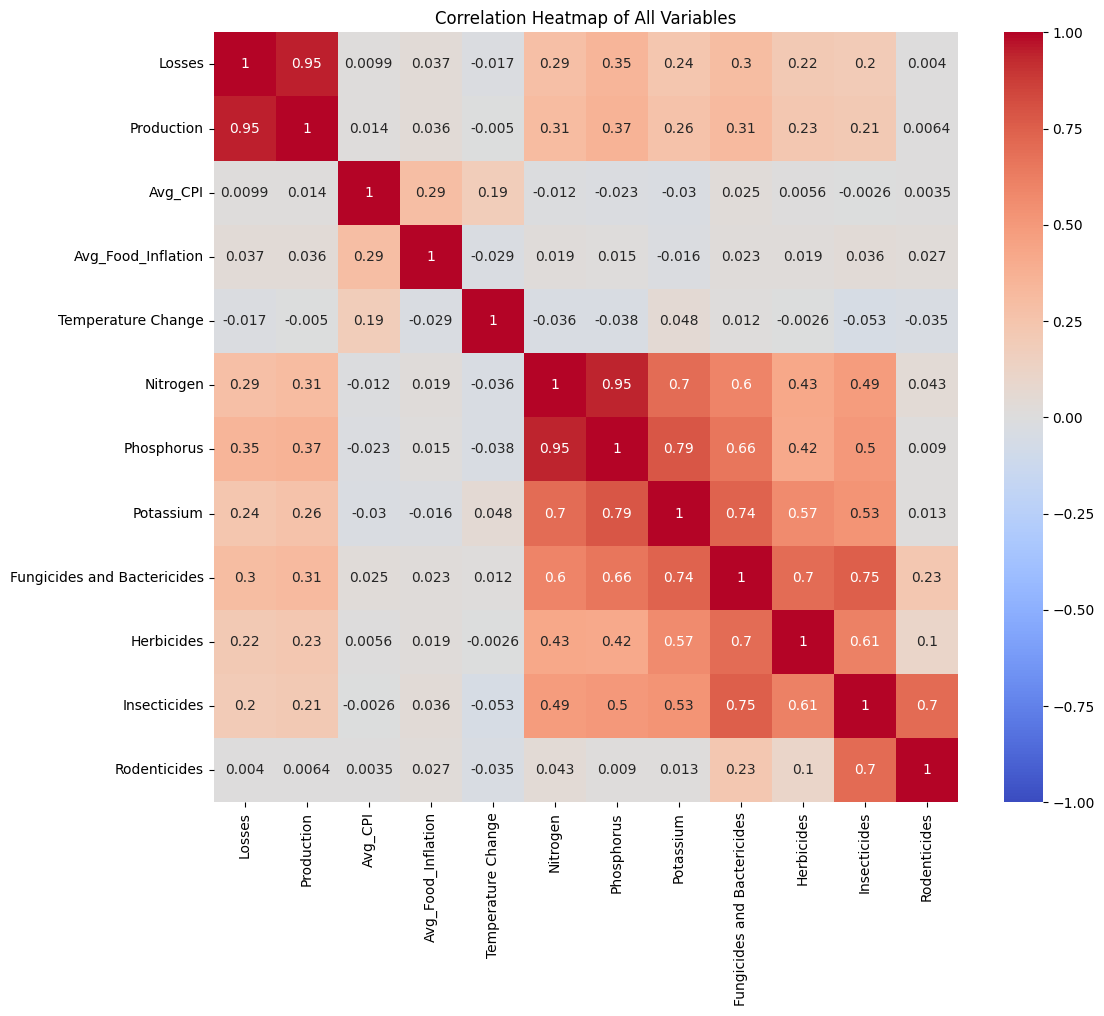

In [714]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of All Variables')
plt.show()

>The variable most strongly correlated with losses is production, with a correlation coefficient of **0.95**. Higher production may lead to higher losses due to the increased number of crops. CPI, inflation, and temperature change show very low correlations with losses. Nutrient balance and pesticide use, however, exhibit moderate to strong positive correlations with each other. The reason for this positive correlation is unclear. Since nutrient balance represents the difference between inputs and outputs, the correlation might arise from farmers applying more minerals and pesticides simultaneously, as higher production would demand greater input quantities. Overall, there is no strong linear correlation between the input variables and the target variable. To explore potential nonlinear relationships, we will transform the data and reassess correlations.

>We will apply a squared transformation to the feature variables to stabilize variance and test if the relationship is nonlinear.

In [715]:
sq_df = agri_data.copy()

In [716]:
import numpy as np
# Apply square root to target variable
sq_df['Losses'] = np.sqrt(sq_df['Losses'])

In [717]:
sq_df.head()

,Item_AG,Losses,Production,Avg_CPI,Avg_Food_Inflation,Temperature Change,Nitrogen,Phosphorus,Potassium,Fungicides and Bactericides,Herbicides,Insecticides,Rodenticides
28225,Millet,23.221111,3951.00,90.110581,4.404059,1.415706,11153.8376,568.8079,7304.5583,0.08,23.77,212.45,0.00
31627,Sour cherries,40.657718,17000.00,95.921667,2.197046,1.349824,52973.5377,10484.9912,36504.1736,277.78,27.65,93.49,47.78
84678,Quinoa,70.779870,100207.00,108.695729,1.900521,1.309412,312293.5073,55781.0311,56603.2283,4448.26,5558.87,2432.00,13.12
53087,Olives,73.176841,56156.66,103.594235,3.592391,1.422059,274262.5500,35042.8480,16161.1956,3281.58,3733.95,1509.14,19.17
98621,"Pepper (Piper spp.), raw",3.694591,758.31,182.629322,12.673821,1.157000,86438.9412,21099.0648,-42884.4086,2290.16,1810.22,975.97,6.44


>We will test the correlation again.

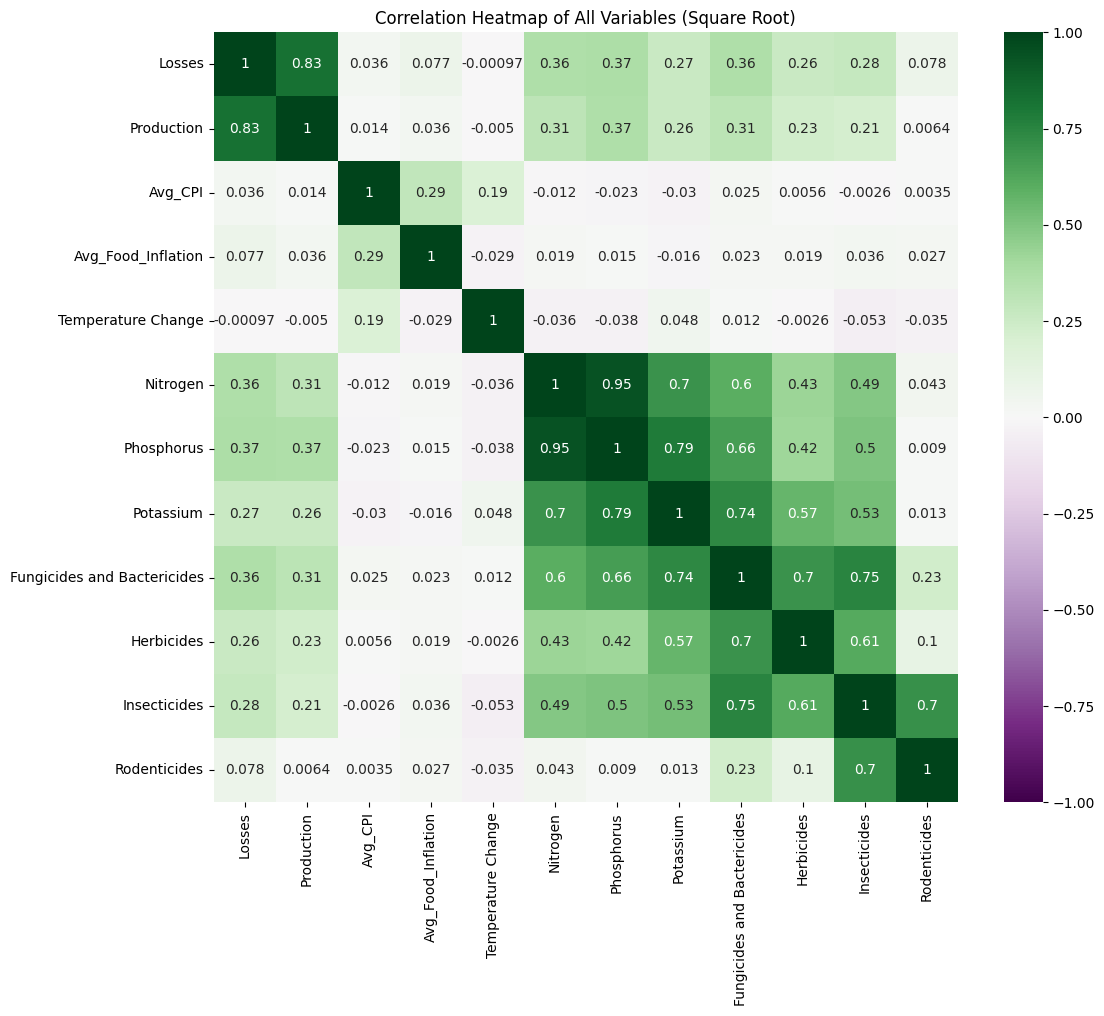

In [718]:
sq_corr = sq_df.iloc[:, 1:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(sq_corr, annot=True, cmap='PRGn', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of All Variables (Square Root)')
plt.show()

>A square root transformation results in a decrease in the correlation coefficients for all variables. While the correlation coefficients for pesticides and minerals remain relatively low, the square root transformation resulted in slight increases in correlation coefficients with smaller increases for CPI and food inflation. These changes provide valuable insight into the relationships between our features and the target variable. There is the possibility of a stronger, more complex, and nonlinear relationship. Analyzing the correlations for both the original and transformed data helps guide the selection of appropriate models as we proceed to train the model.

>Let's make scatter plots of each variable to further assess their correlation to the target variable.

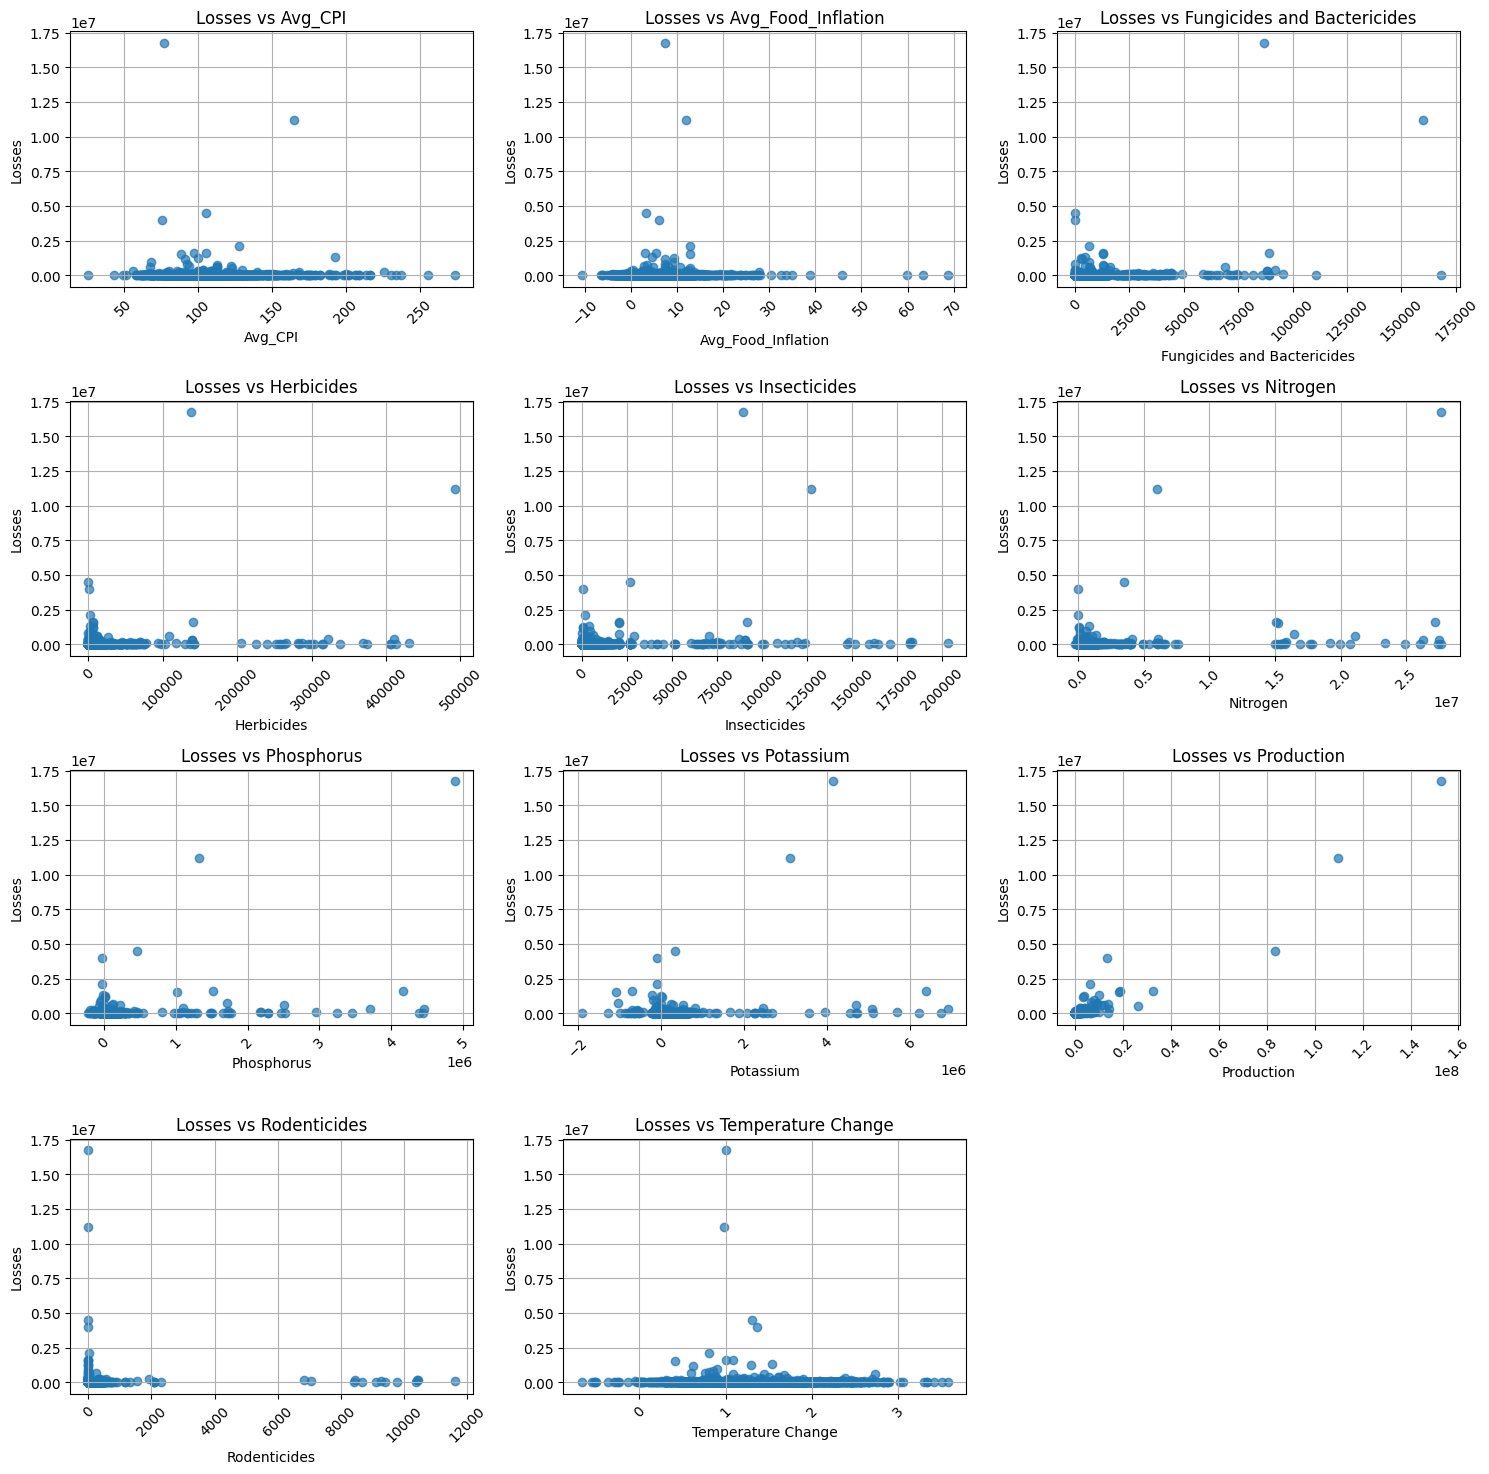

In [719]:
# Exclude 'Item_AG' and prepare variables for plotting
variables = agri_data.columns.difference(['Item_AG', 'Losses'])

# Set up subplots
n_vars = len(variables)
fig, axes = plt.subplots(4, 3, figsize=(15, 15), sharey=False)
axes = axes.flatten()

# Plot each variable against Losses
for i, var in enumerate(variables):
    axes[i].scatter(agri_data[var], agri_data['Losses'], alpha=0.7)
    axes[i].set_title(f"Losses vs {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Losses")
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(variables), len(axes)):
    axes[j].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

>We will also plot the data with the square root transformation.

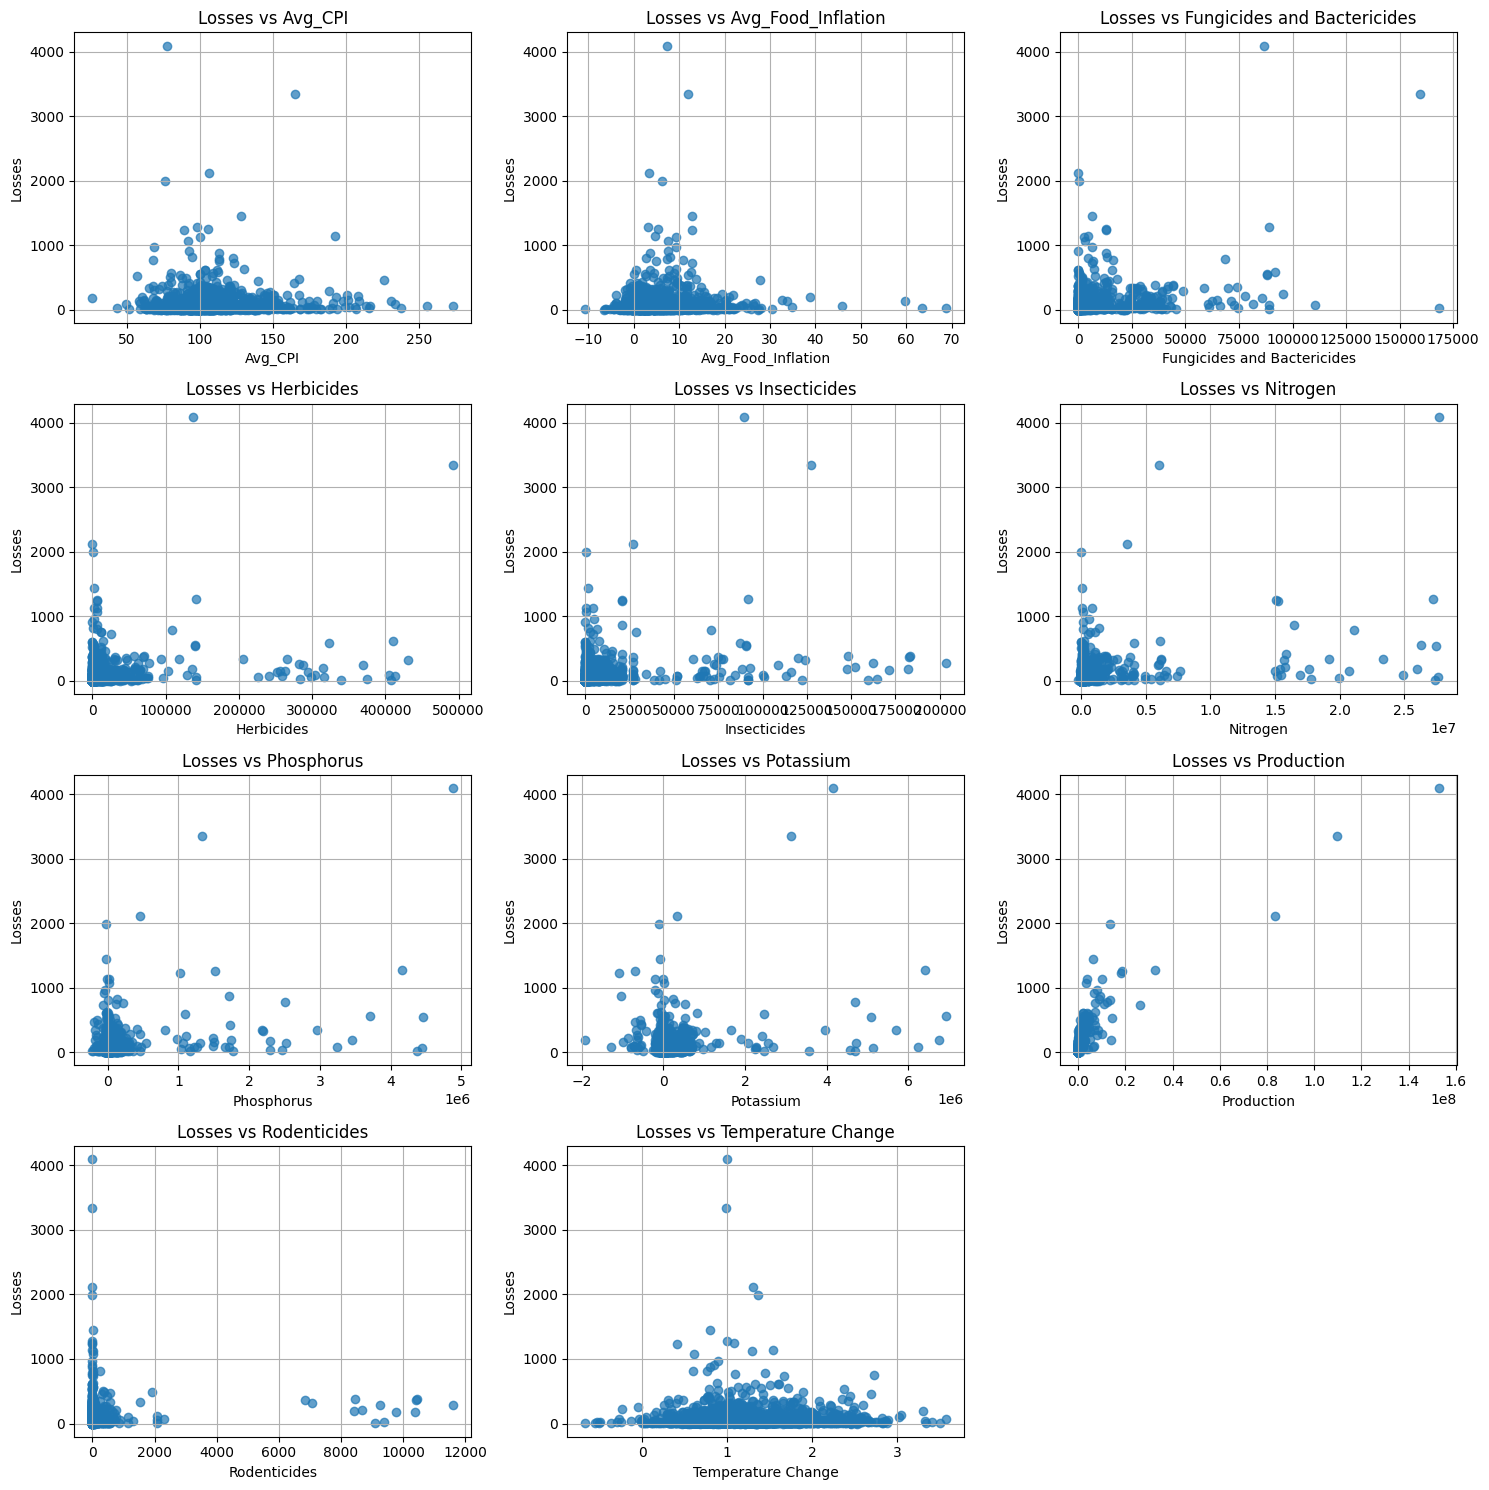

In [720]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), sharey=False)
axes = axes.flatten()

# Plot each variable against Losses
for i, var in enumerate(variables):
    axes[i].scatter(sq_df[var], sq_df['Losses'], alpha=0.7)
    axes[i].set_title(f"Losses vs {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Losses")
    axes[i].grid(True)

# Hide any unused subplots
for j in range(len(variables), len(axes)):
    axes[j].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [721]:
sq_filter_corr = sq_df.iloc[:, 1:].corr()
print(sq_filter_corr.iloc[:, 0])

Losses                         1.000000
Production                     0.825937
Avg_CPI                        0.035771
Avg_Food_Inflation             0.076694
Temperature Change            -0.000969
Nitrogen                       0.362127
Phosphorus                     0.372954
Potassium                      0.265109
Fungicides and Bactericides    0.360953
Herbicides                     0.262575
Insecticides                   0.281117
Rodenticides                   0.077892
Name: Losses, dtype: float64


In [722]:
agri_filter_corr = agri_data.iloc[:, 1:].corr()
print(agri_filter_corr.iloc[:, 0])

Losses                         1.000000
Production                     0.951903
Avg_CPI                        0.009908
Avg_Food_Inflation             0.037120
Temperature Change            -0.016873
Nitrogen                       0.286405
Phosphorus                     0.349536
Potassium                      0.238882
Fungicides and Bactericides    0.299108
Herbicides                     0.218415
Insecticides                   0.196311
Rodenticides                   0.003997
Name: Losses, dtype: float64


>In the original data, we observe a linear correlation between the production variable and losses. However, applying a square root transformation to the data makes the correlation between the production variable and the losses variable appear more logarithmic. While the correlation coefficient for the production variable is lower in the square root-transformed data, the pesticide and mineral variables show slightly higher correlation coefficients.

>Next we will use label encoding for the different type of crops. This allows tree-based models to still detect crop differences by splitting on these encoded values. We will compare performance of different models with and without the crop item. Variables with low correlation coefficients will not be dropped since we will potentially use tree-based models which are less affected by low correlation coefficients and any multicollinearity that may exist in the pesticide and nutrient variables.

#### Preprocessing

In [723]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

agri_data_encoded = agri_data.copy()
# Fit and transform 'Item_AG' to numerical labels
agri_data_encoded['Item_AG'] = encoder.fit_transform(agri_data_encoded['Item_AG'])

sq_df_encoded = sq_df.copy()
# Fit and transform 'Item_AG' to numerical labels
sq_df_encoded['Item_AG'] = encoder.fit_transform(sq_df_encoded['Item_AG'])

In [724]:
agri_data_encoded.head(3)

,Item_AG,Losses,Production,Avg_CPI,Avg_Food_Inflation,Temperature Change,Nitrogen,Phosphorus,Potassium,Fungicides and Bactericides,Herbicides,Insecticides,Rodenticides
28225,88,539.22,3951.0,90.110581,4.404059,1.415706,11153.8376,568.8079,7304.5583,0.08,23.77,212.45,0.00
31627,140,1653.05,17000.0,95.921667,2.197046,1.349824,52973.5377,10484.9912,36504.1736,277.78,27.65,93.49,47.78
84678,127,5009.79,100207.0,108.695729,1.900521,1.309412,312293.5073,55781.0311,56603.2283,4448.26,5558.87,2432.00,13.12


In [725]:
sq_df_encoded.head(3)

,Item_AG,Losses,Production,Avg_CPI,Avg_Food_Inflation,Temperature Change,Nitrogen,Phosphorus,Potassium,Fungicides and Bactericides,Herbicides,Insecticides,Rodenticides
28225,88,23.221111,3951.0,90.110581,4.404059,1.415706,11153.8376,568.8079,7304.5583,0.08,23.77,212.45,0.00
31627,140,40.657718,17000.0,95.921667,2.197046,1.349824,52973.5377,10484.9912,36504.1736,277.78,27.65,93.49,47.78
84678,127,70.779870,100207.0,108.695729,1.900521,1.309412,312293.5073,55781.0311,56603.2283,4448.26,5558.87,2432.00,13.12


>Before selecting a model, we will look at mutual information scores for our feature variables using both the original data and the transformed data.

In [726]:
from sklearn.feature_selection import mutual_info_regression

# Define function for MI scores
def get_mi(xdata, ydata):
    mi_score = mutual_info_regression(xdata, ydata)
    mi_score = pd.Series(mi_score, name="MI Scores", index=xdata.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

mif_og = get_mi(agri_data[agri_data.columns.tolist()[2:]], agri_data['Losses'])
mif_sq = get_mi(sq_df[sq_df.columns.tolist()[2:]], sq_df['Losses'])

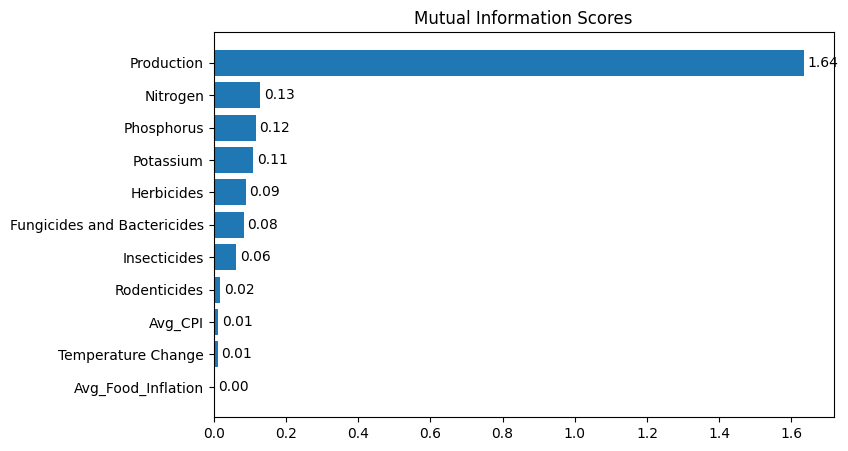

In [727]:
# Plot MI scores
plt.figure(dpi=100, figsize=(8, 5))
scores_og = mif_og.sort_values(ascending=True)
width_og = np.arange(len(scores_og))
ticks_og = list(scores_og.index)
plt.barh(width_og, scores_og)
plt.yticks(width_og, ticks_og)
plt.title("Mutual Information Scores")
# Add labels to bars
for i, score in enumerate(scores_og):
    plt.text(score + 0.01, i, f'{score:.2f}', va='center')
plt.show()

Text(0.5, 1.0, 'Mutual Information Scores (Squared Transformation)')

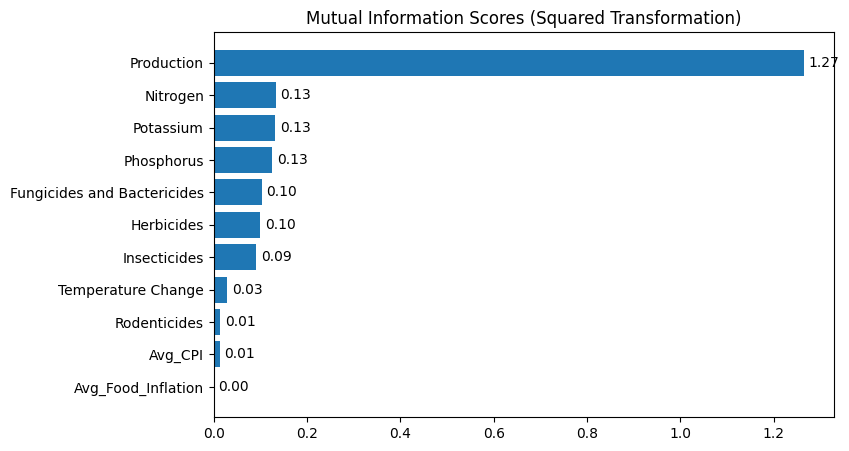

In [728]:
# Plot MI scores
plt.figure(dpi=100, figsize=(8, 5))
scores_sq = mif_sq.sort_values(ascending=True)
width_sq = np.arange(len(scores_sq))
ticks_sq = list(scores_sq.index)
plt.barh(width_sq, scores_sq)
plt.yticks(width_sq, ticks_sq)
# Add labels to bars
for i, score in enumerate(scores_sq):
    plt.text(score + 0.01, i, f'{score:.2f}', va='center')
plt.title("Mutual Information Scores (Squared Transformation)")

>The MI plot shows that production has the highest mutual information score followed by smaller scores for minerals and pesticide use. The squared transformation results in a decrease of **0.37** for production's **MI score** while pesticide and mineral variables did not change significantly. Now let's test the base models on the two datasets.

#### Assessing Different Models

In [729]:
# Import all models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

>First, we will create a list of models without tuned parameters to test them on the data with one-hot encoding and without. Whichever model performs best will be selected for hyperparameter tuning.

In [730]:
# Create a list of models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=43),
    "Linear Regression": LinearRegression(),
    "XGB": XGBRegressor(random_state=44)
}

In [731]:
# Split data in features and variables for data with item category and without
features_with_item = agri_data_encoded.drop(columns='Losses')
target_with_item = agri_data_encoded['Losses']

features_without_item = agri_data.drop(columns=['Losses', 'Item_AG'])
target_without_item = agri_data['Losses']

In [732]:
features_with_item.head(3)

,Item_AG,Production,Avg_CPI,Avg_Food_Inflation,Temperature Change,Nitrogen,Phosphorus,Potassium,Fungicides and Bactericides,Herbicides,Insecticides,Rodenticides
28225,88,3951.0,90.110581,4.404059,1.415706,11153.8376,568.8079,7304.5583,0.08,23.77,212.45,0.00
31627,140,17000.0,95.921667,2.197046,1.349824,52973.5377,10484.9912,36504.1736,277.78,27.65,93.49,47.78
84678,127,100207.0,108.695729,1.900521,1.309412,312293.5073,55781.0311,56603.2283,4448.26,5558.87,2432.00,13.12


In [733]:
features_without_item.head(3)

,Production,Avg_CPI,Avg_Food_Inflation,Temperature Change,Nitrogen,Phosphorus,Potassium,Fungicides and Bactericides,Herbicides,Insecticides,Rodenticides
28225,3951.0,90.110581,4.404059,1.415706,11153.8376,568.8079,7304.5583,0.08,23.77,212.45,0.00
31627,17000.0,95.921667,2.197046,1.349824,52973.5377,10484.9912,36504.1736,277.78,27.65,93.49,47.78
84678,100207.0,108.695729,1.900521,1.309412,312293.5073,55781.0311,56603.2283,4448.26,5558.87,2432.00,13.12


>Next we split the data into training and testing tests.

In [734]:
from sklearn.model_selection import train_test_split

# Encoded data
ohe_train_x, ohe_val_x, ohe_train_y, ohe_val_y = train_test_split(features_with_item, target_with_item, train_size=0.8, random_state=12)
# Data without item category
train_x, val_x, train_y, val_y = train_test_split(features_without_item, target_without_item, train_size=0.8, random_state=12)

>Now let's test the base models.

In [735]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# Test on original data
for i, j in models.items():
    model = j
    model.fit(train_x, train_y)
    predictions = model.predict(val_x)

    mae = mean_absolute_error(val_y, predictions)
    r2 = r2_score(val_y, predictions)
    mse = np.sqrt(mean_squared_error(val_y, predictions))
    
    print(f"Model: {i}, MAE: {mae:.2f}, R2 score: {r2:.2f}, RMSE: {mse:.2f}")

Model: Decision Tree, MAE: 48544.33, R2 score: 0.26, RMSE: 510378.31
Model: Random Forest, MAE: 48113.73, R2 score: 0.41, RMSE: 456317.34
Model: Linear Regression, MAE: 30594.38, R2 score: 0.96, RMSE: 119619.71
Model: XGB, MAE: 47131.19, R2 score: 0.10, RMSE: 562464.80


In [736]:
# Test on data with label encoding
for i, j in models.items():
    model = j
    model.fit(ohe_train_x, ohe_train_y)
    predictions = model.predict(ohe_val_x)

    mae = mean_absolute_error(ohe_val_y, predictions)
    r2 = r2_score(ohe_val_y, predictions)
    mse = np.sqrt(mean_squared_error(ohe_val_y, predictions))
    
    print(f"Model: {i}, MAE: {mae:.2f}, R2 score: {r2:.2f}, RMSE: {mse:.2f}")

Model: Decision Tree, MAE: 49008.29, R2 score: 0.25, RMSE: 511654.30
Model: Random Forest, MAE: 49683.44, R2 score: 0.38, RMSE: 464884.31
Model: Linear Regression, MAE: 34869.30, R2 score: 0.96, RMSE: 119399.67
Model: XGB, MAE: 44934.87, R2 score: 0.09, RMSE: 562961.04


>In the original data, the linear regression model outperformed other models with a mean absolute error **30,594.38**, root mean square error **119,619.71** and the highest R-squared value of **0.96**.

>In the data with label encoding, the linear regression model had similar metrics and resulted in a mean absolute error **34,869.30**, root mean square error **119,399.67** and an R-squared value of **0.96**.

>Overall, there is not a significant difference in performance of the models between the data with label encoding and the data without the crop category.

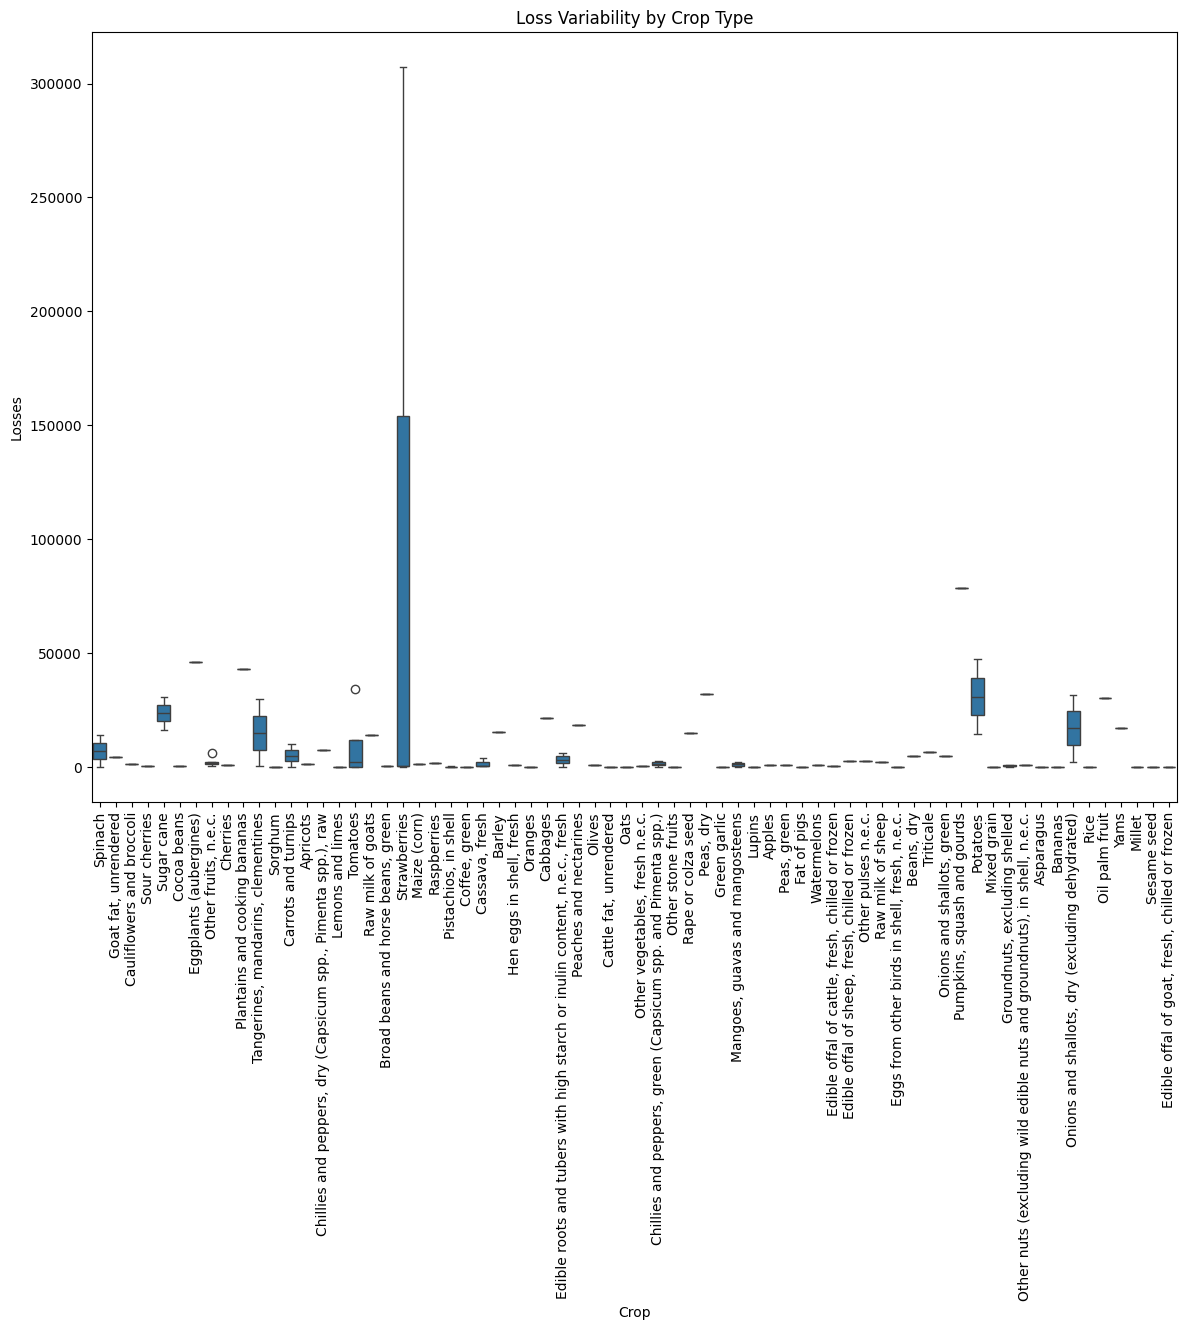

In [737]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='Item_AG', y='Losses', data=agri_data.sample(frac=0.05, random_state=21))
plt.xlabel('Crop')
plt.ylabel('Losses')
plt.xticks(rotation=90)
plt.title("Loss Variability by Crop Type")
plt.show()

>The visualization above suggests there is notable difference between variance of losses for different crops. This violation of homogeneity of variance suggests that crop type has an influence on losses and should be included in our data.

>Lastly let's test model performance on the original data against data with the square root transformation.

In [738]:
# Seperate feautres and targets for both datasets
norm_features = agri_data_encoded.drop(columns='Losses')
norm_target= agri_data_encoded['Losses']

sq_features = sq_df_encoded.drop(columns='Losses')
sq_target = sq_df_encoded['Losses']

# Original data
norm_train_x, norm_val_x, norm_train_y, norm_val_y = train_test_split(norm_features, norm_target, train_size=0.8, random_state=12)
# Square root data
sq_train_x, sq_val_x, sq_train_y, sq_val_y = train_test_split(sq_features, sq_target, train_size=0.8, random_state=12)

>We will now test the models.

#### Encoded Original Data

In [739]:
for i, j in models.items():
    model = j
    model.fit(norm_train_x, norm_train_y)
    predictions = model.predict(norm_val_x)

    mae = mean_absolute_error(norm_val_y, predictions)
    r2 = r2_score(norm_val_y, predictions)
    mse = np.sqrt(mean_squared_error(norm_val_y, predictions))
    
    print(f"Model: {i}, MAE: {mae:.2f}, R2 score: {r2:.2f}, RMSE: {mse:.2f}")

Model: Decision Tree, MAE: 49008.29, R2 score: 0.25, RMSE: 511654.30
Model: Random Forest, MAE: 49683.44, R2 score: 0.38, RMSE: 464884.31
Model: Linear Regression, MAE: 34869.30, R2 score: 0.96, RMSE: 119399.67
Model: XGB, MAE: 44934.87, R2 score: 0.09, RMSE: 562961.04


#### Encoded Data with Square Root Transformation

In [740]:
for i, j in models.items():
    model = j
    model.fit(sq_train_x, sq_train_y)
    predictions = model.predict(sq_val_x)

    mae = mean_absolute_error(sq_val_y, predictions)
    r2 = r2_score(sq_val_y, predictions)
    mse = np.sqrt(mean_squared_error(sq_val_y, predictions))
    
    print(f"Model: {i}, MAE: {mae:.2f}, R2 score: {r2:.2f}, RMSE: {mse:.2f}")

Model: Decision Tree, MAE: 41.70, R2 score: 0.32, RMSE: 174.15
Model: Random Forest, MAE: 30.57, R2 score: 0.77, RMSE: 101.40
Model: Linear Regression, MAE: 57.18, R2 score: 0.75, RMSE: 105.33
Model: XGB, MAE: 31.88, R2 score: 0.70, RMSE: 116.36


>On the encoded data with square root transformations we have lower error rates for all models. The model with the best performance is the random forest algorithm with an **R2 value of 0.77** and **MAE of 30.57**.

In [741]:
from sklearn.model_selection import cross_val_score
for i, j in models.items():
    model_scores = cross_val_score(j, sq_train_x, sq_train_y, cv=5, scoring='neg_mean_absolute_error')
    print(f"Model: {i}, MAE: {-model_scores.mean()}")

Model: Decision Tree, MAE: 39.73968306484933
Model: Random Forest, MAE: 29.905720728417286
Model: Linear Regression, MAE: 55.57347471151754
Model: XGB, MAE: 34.64353561535205


>Mean absolute error improved significantly after applying the square root transformation. Since performance was better for 3 out of 4 models on the data with the square root transformation we will use the transformed data for training. Let's plot the distributions of each feature to determine what scaling technique, if any, we should use.

#### Assessing Feature Distributions

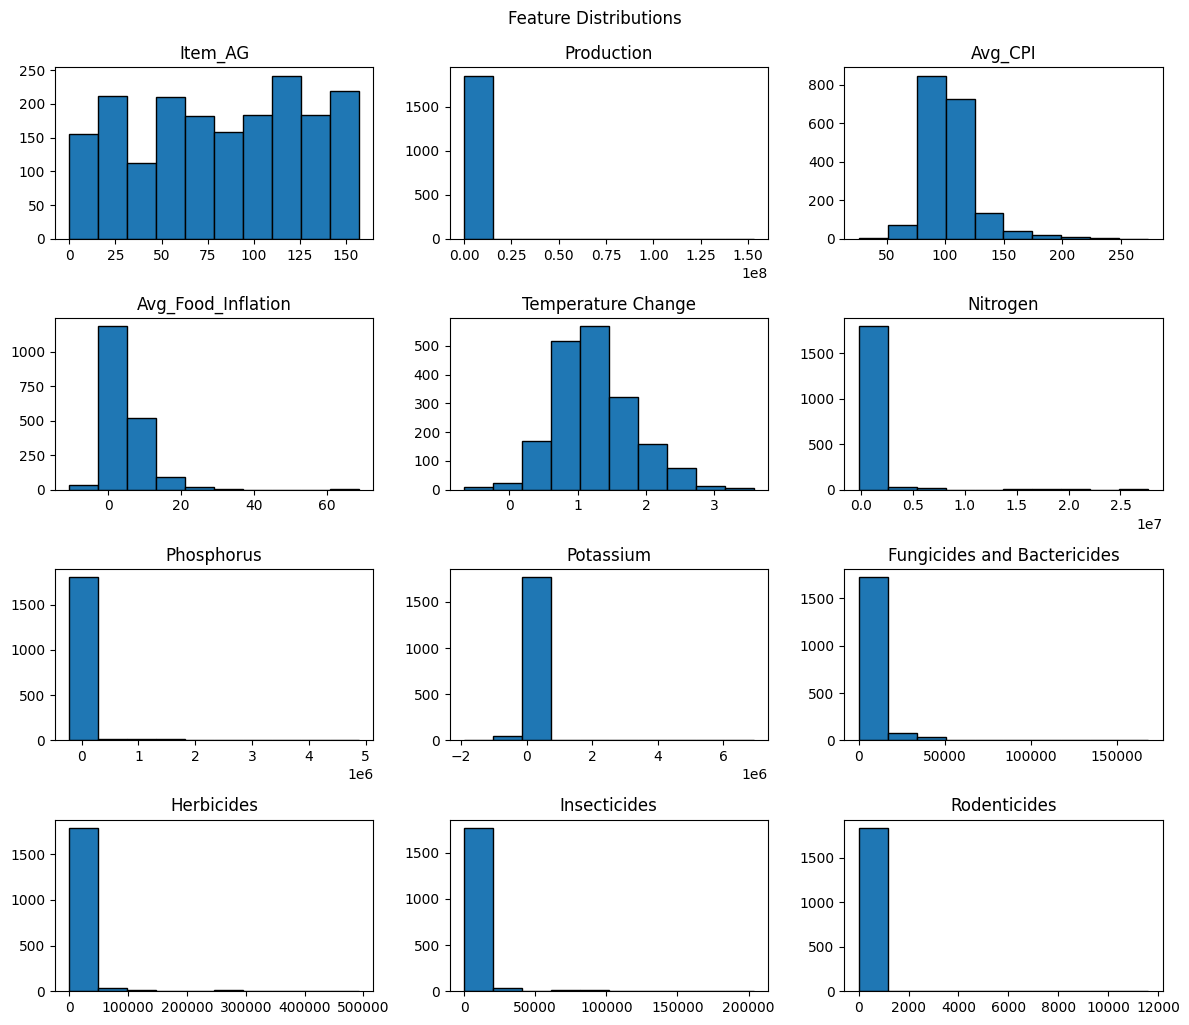

In [742]:
# Plot distributions of each feature
plt.figure(figsize=(12, 10))
for i, col in enumerate(norm_features.columns):
    plt.subplot(4, 3, i + 1)
    plt.hist(norm_features[col], bins=10, edgecolor='k')
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Feature Distributions', y=1.02)
plt.show()

>The only feature that nears a normal distribution is the temperature change data. The item category does not suggest class imbalance. Pesticide and mineral categories indicate outliers. We will assess the effect of robust scaling for this data.

#### Scaling

In [743]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_scaled_train = scaler.fit_transform(sq_train_x)
x_scaled_val = scaler.fit_transform(sq_val_x)

In [744]:
# Check for successful scaling
x_scaled_train[:3]

array([[-0.38709677, -0.11774713,  0.18325401,  0.32629563,  0.90320003,
        -0.3348029 , -1.52337691, -1.18342238, -0.1659499 , -0.20103837,
        -0.20021032,  0.03512623],
       [-0.99354839, -0.0487049 ,  1.00261634, -0.46877566,  0.0952419 ,
        -0.13301936, -0.32557073,  0.18333518,  0.01647763, -0.00388079,
        -0.0530543 , -0.00439078],
       [ 0.20645161, -0.09069055, -0.45953931, -0.97529242, -0.03379809,
        -0.0343242 ,  0.03339509,  0.73641219, -0.1524565 , -0.09086678,
        -0.0948961 , -0.00439078]])

In [745]:
x_scaled_val[:3]

array([[-3.31325301e-01, -1.00126458e-01, -4.80265887e-01,
        -9.14319323e-01, -6.01911601e-01, -3.40513214e-01,
        -9.53610579e-02, -7.79257462e-02, -1.78916721e-01,
        -2.70042590e-01, -1.62727626e-01,  3.50681333e-01],
       [ 2.34939759e-01, -5.37563213e-02, -1.91760679e-01,
         1.92051545e-01, -5.63097375e-01, -3.52025855e-01,
        -6.66899749e-02, -2.07279061e-02, -1.39134508e-01,
        -1.46048984e-01, -5.67913630e-02,  1.63125923e+00],
       [ 5.36144578e-01,  1.02258147e-04,  1.97009527e+00,
         4.91117405e-01,  2.78831692e+00,  2.61491902e+00,
         2.01186883e+00,  6.77902418e+00,  1.34339317e-01,
         6.44759375e-01, -1.41245290e-01, -2.36414382e-02]])

>Scaling was successful. Now we will retest the models.

In [746]:
for i, j in models.items():
    model = j
    model.fit(x_scaled_train, sq_train_y)
    predictions = model.predict(x_scaled_val)

    mae = mean_absolute_error(sq_val_y, predictions)
    r2 = r2_score(sq_val_y, predictions)
    mse = np.sqrt(mean_squared_error(sq_val_y, predictions))
    
    print(f"Model: {i}, MAE: {mae:.2f}, R2 score: {r2:.2f}, RMSE: {mse:.2f}")

Model: Decision Tree, MAE: 45.05, R2 score: 0.33, RMSE: 172.33
Model: Random Forest, MAE: 33.40, R2 score: 0.73, RMSE: 110.06
Model: Linear Regression, MAE: 61.40, R2 score: 0.69, RMSE: 117.60
Model: XGB, MAE: 35.31, R2 score: 0.70, RMSE: 116.26


>MAE saw a slight increase for all four models. R2 values decreased for 2 out of 4 models. We will not scale our data. The random forest model will be our selected model. We will now focus on hyperparameter tuning.

#### Hyperparameter Tuning

In [747]:
from sklearn.model_selection import RandomizedSearchCV
import math

# Define params for random forest algorithm
param_grid = {
    'n_estimators': [int(i) for i in np.linspace(50, 250, num=5)],
    'max_leaf_nodes': [int(i) for i in np.arange(5, 125, 20)] 
}

In [748]:
# Instantiate model
rf = RandomForestRegressor(random_state=42)

In [749]:
# Search for best parameters
our_model = RandomizedSearchCV(
    rf, param_distributions=param_grid, n_iter=15, cv=5, scoring='neg_mean_squared_error', random_state=42
)

our_model.fit(sq_train_x, sq_train_y)

model_params = our_model.best_params_
model_score = our_model.best_score_

print(f"Best params: {model_params}\nRMSEe: {np.sqrt(-model_score)}")

Best params: {'n_estimators': 50, 'max_leaf_nodes': 25}
RMSEe: 109.936064627702


>The best parameters for our model from a randomized search:
- **50** for n_estimators
- **25** for max_leaf_nodes

>Let's assess the final model using the parameters.

#### Model Evaluation

In [750]:
from sklearn.pipeline import Pipeline

final_model = RandomForestRegressor(random_state=42, n_estimators=50, max_leaf_nodes=25)

In [751]:
final_model.fit(sq_train_x, sq_train_y)

RandomForestRegressor(max_leaf_nodes=25, n_estimators=50, random_state=42)

>We will generate evaluation metrics using **mean absolute error**, **R-squared value**, **root mean square error** and **cross validation**.

In [752]:
final_predictions = final_model.predict(sq_val_x)

final_mae = mean_absolute_error(sq_val_y, final_predictions)
final_r2 = r2_score(sq_val_y, final_predictions)
final_mse = np.sqrt(mean_squared_error(sq_val_y, final_predictions))

print(f"Model: Random Forest, MAE: {final_mae:.2f}, R2 score: {final_r2:.2f}, RMSE: {final_mse:.2f}")

Model: Random Forest, MAE: 28.37, R2 score: 0.83, RMSE: 86.70


>This random forest model performs better than our previous model on the transformed data with slightly lower MAE and RMSE. To try to improve our model, we will not set an argument for max_leaf_nodes and lower n_estimators. When no argument is given for max_leaf_nodes there is no limit.

In [753]:
model_2 = RandomForestRegressor(random_state=42, n_estimators=25)

model_2.fit(sq_train_x, sq_train_y)

RandomForestRegressor(n_estimators=25, random_state=42)

In [754]:
predictions_2 = model_2.predict(sq_val_x)

mae_2 = mean_absolute_error(sq_val_y, predictions_2)
r2_2 = r2_score(sq_val_y, predictions_2)
mse_2 = np.sqrt(mean_squared_error(sq_val_y, predictions_2))

print(f"Model: Random Forest (Model 2), MAE: {mae_2:.2f}, R2 score: {r2_2:.2f}, RMSE: {mse_2:.2f}")

Model: Random Forest (Model 2), MAE: 28.24, R2 score: 0.85, RMSE: 82.56


>The MAE and RMSE are better and the R-squared value is 0.02 higher. N_estimators will be 25.

In [755]:
print("Minimum Loss:", sq_val_y.min())
print("Maximum Loss:", sq_val_y.max())

Minimum Loss: 0.0
Maximum Loss: 3347.0529469968055


>Our validation dataset has a **minimum loss of 0.0** and a **maximum loss of 3,347.05**. The **MAE of 28.24** indicates this model performs well on the dataset given the range of the loss variable.

>Let's compare our model's performance on the training data to check if there is overfitting for this model.

In [756]:
from sklearn.model_selection import cross_val_score
model_2_r2 = cross_val_score(model_2, sq_train_x, sq_train_y, cv=5, scoring='r2')
model_2_mae = cross_val_score(model_2, sq_train_x, sq_train_y, cv=5, scoring='neg_mean_absolute_error')
model_2_rmse = np.sqrt(-cross_val_score(model_2, sq_train_x, sq_train_y, cv=5, scoring='neg_mean_squared_error').mean())
print(f"R-squared: {model_2_r2.mean()}, MAE: {-model_2_mae.mean()}, RMSE: {model_2_rmse}")

R-squared: 0.6402615815751806, MAE: 29.9662744527051, RMSE: 112.84016123379354


In [757]:
print("Minimum Loss:", sq_train_y.min())
print("Maximum Loss:", sq_train_y.max())

Minimum Loss: 0.0
Maximum Loss: 4093.5530777064564


>Here we can see the R-squared value is 0.21 lower with a slightly higher MAE of **29.96** 

In [758]:
print("Predictions:", predictions[:5])

Predictions: [ 7.7326097 19.294415  43.67151   12.37943   24.288425 ]


In [759]:
print("Actual:", [round(i, 2) for i in sq_val_y[:5].tolist()])

Actual: [1.24, 24.66, 49.59, 7.77, 42.75]


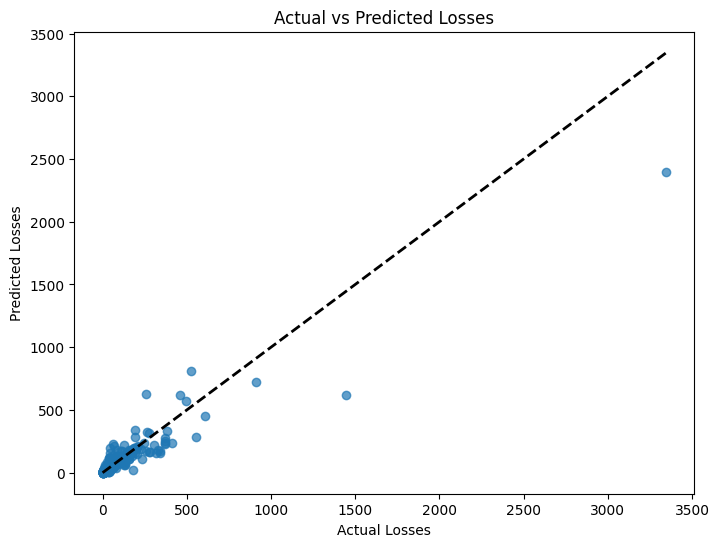

In [760]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(sq_val_y, predictions_2, alpha=0.7)
plt.plot([sq_val_y.min(), sq_val_y.max()], [sq_val_y.min(), sq_val_y.max()], 'k--', lw=2)
plt.xlabel('Actual Losses')
plt.ylabel('Predicted Losses')
plt.title('Actual vs Predicted Losses')
plt.show()

>Visualization of actual vs predicted losses shows our model accurately predicts the target variable. Changes in n_estimators and max_leaf_nodes results in small changes to MAE, R-squared value, and RMSE. This final model has resulted in the most accurate scores so far. This will be our final model. We will save this model.

In [761]:
import joblib

# Save the model
joblib.dump(model_2, 'random_forest_pipeline.pkl')

['random_forest_pipeline.pkl']

## Conclusion

After experimenting with various models, the Random Forest Regressor emerged as the most effective.

- Mean Absolute Error (MAE): 29.96
- R² Score: 0.64
- Root Mean Squared Error (RMSE): 112.84
- This high R² score indicates that the model explains 64% of the variance in food loss, reflecting strong predictive capability.

Analysis of agricultural factors such as pesticide application, nutrient balance and crop yield provide the mose valuable insights into their correlation with food loss.